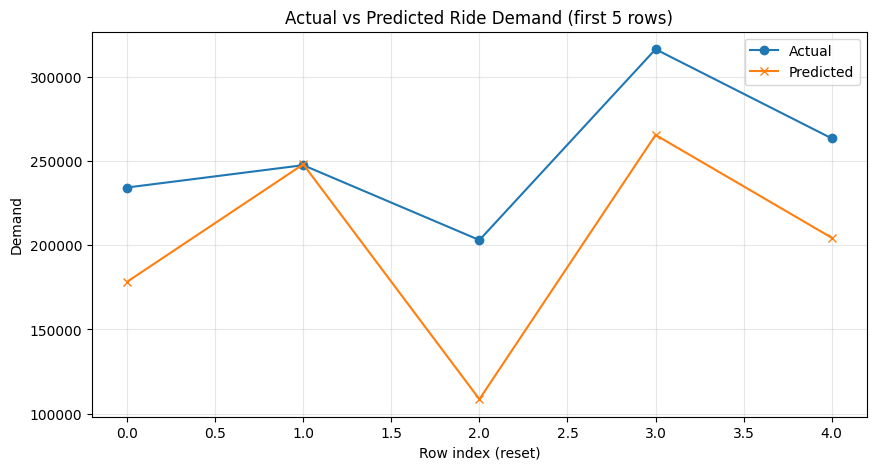

Rows in demand_df: 24
Mean Absolute Error: 52213.249496981894


In [2]:
# ...existing code...
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

csv_path = r"C:\Users\asara\OneDrive\Documents\Desktop\BIG DATA\data\silver\ride_demand_silver.csv"

# aggregate demand by pickup hour without loading whole file
usecols = ["tpep_pickup_datetime"]
parse_dates = ["tpep_pickup_datetime"]
chunksize = 100_000
hour_counts = pd.Series(0, index=range(24), dtype="int64")

for chunk in pd.read_csv(csv_path, usecols=usecols, parse_dates=parse_dates, chunksize=chunksize, low_memory=True):
    chunk["tpep_pickup_datetime"] = pd.to_datetime(chunk["tpep_pickup_datetime"], errors="coerce")
    hrs = chunk["tpep_pickup_datetime"].dt.hour.dropna().astype(int)
    if not hrs.empty:
        counts = hrs.value_counts()
        hour_counts = hour_counts.add(counts, fill_value=0)

demand_df = hour_counts.reset_index()
demand_df.columns = ["hour", "demand"]
demand_df["hour"] = demand_df["hour"].astype(int)
demand_df["demand"] = demand_df["demand"].astype(int)

# simple model
X = demand_df[["hour"]]
y = demand_df["demand"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# plotting (ensure matching lengths / reset index)
y_test_plot = pd.Series(y_test.values).reset_index(drop=True)
y_pred_plot = pd.Series(y_pred).reset_index(drop=True)
n = min(100, len(y_test_plot), len(y_pred_plot))
if n == 0:
    raise ValueError("No values to plot.")

plt.figure(figsize=(10,5))
plt.plot(y_test_plot.iloc[:n], label='Actual', marker='o')
plt.plot(y_pred_plot.iloc[:n], label='Predicted', marker='x')
plt.legend()
plt.title(f"Actual vs Predicted Ride Demand (first {n} rows)")
plt.xlabel("Row index (reset)")
plt.ylabel("Demand")
plt.grid(alpha=0.3)
plt.show()

print("Rows in demand_df:", demand_df.shape[0])
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
# ...existing code...